In [101]:
%reset-f


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
%load_ext autoreload
%autoreload
from wb_api_wraper import *
from scat import *
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###Income of each quitinile in 2005 USD PPP

In [102]:
share1   =get_wb_mrv('SI.DST.FRST.20'   ,"share1")/100#share of income bottom 20%
share2   =get_wb_mrv('SI.DST.02nd.20'   ,"share2")/100#share of income second 
share3   =get_wb_mrv('SI.DST.03rd.20'   ,"share3")/100#share of income 3rd
share4   =get_wb_mrv('SI.DST.04th.20'   ,"share4")/100#share of income 4th
share5   =get_wb_mrv('SI.DST.05th.20'   ,"share5")/100#share of income 5th

In [103]:
gdp_pc_pp=get_wb_mrv('NY.GDP.PCAP.pp.kd',"gdp_pc_pp")/ 1.152 #Gdp per capita from 2011PPP to 2005 PPP
gdp_tot_pp=get_wb_mrv('NY.GDP.MKTP.PP.KD',"gdp_tot_pp")/ 1.152 #Gdp from 2011PPP to 2005 PPP


In [214]:
y1=share1*gdp_pc_pp*5
y2=share2*gdp_pc_pp*5
y3=share3*gdp_pc_pp*5
y4=share4*gdp_pc_pp*5
y5=share5*gdp_pc_pp*5


income=pd.DataFrame()
income["poor"]=y1
income["nonpoor"]=(y2+y3+y4+y5)
income["pop"]=gdp_pc_pp
income["extreme"]=1.25 * 365


Gets list of all aspire indicators

In [198]:
#Get all wb indicators 
a=wb.search(".*")
a.to_csv("wb_indicators_library.csv")
all_aspire_indicators = a.ix[["ASPIRE" in s.decode("utf-8") for s in a.sourceOrganization.tolist()]] #ASPIRE cited in source
all_aspire_indicators.to_csv("hop.csv")

In [199]:
what_to_code = pd.read_csv("aspire_what_codes.csv",index_col=0,squeeze=True) #disct from Mook
what_to_code
list_what_names=  what_to_code.index.tolist()
what_to_code

desc
Coverage               cov
Adequacy               adq
Per Capita Transfer    avt
Name: code, dtype: object

In [200]:
cat_to_code = pd.read_csv("aspire_cat_codes.csv",index_col=0,squeeze=True) #disct from Mook
cat_to_code

Description
Active Labor Market                   _lm_ac
All Labor Market                   _lm_alllm
All Private Transfers                   _rem
All Social Assistance              _sa_allsa
All Social Insurance               _si_allsi
Cash Transfer                         _sa_ct
Conditional Cash Transfers           _sa_cct
Contributory Pensions                 _si_oa
Domestic Private Transfers            _pr_dp
In-Kind                               _sa_ik
International Private Transfers       _pr_ip
Other Social Assistance              _sa_osa
Other Social Insurance                _si_ss
Passive Labor Market                  _lm_ub
Public Works                          _sa_pw
School Feeding                        _sa_sf
Social Pensions                       _sa_sp
Subsidies                             _sa_su
All Social Protection and Labor       _allsp
Name: Middle Code, dtype: object

In [201]:
list_cat_names =  ["All Labor Market" ,"All Social Assistance" ,"All Social Insurance" ,"All Private Transfers"]
#convinience
alm,asa,asi,apt = list_cat_names
list_cat_codes = [cat_to_code[desc] for desc in list_cat_names ]
list_cat_codes

['_lm_alllm', '_sa_allsa', '_si_allsi', '_rem']

In [202]:
income_group_to_keys = pd.read_csv("income_groups.csv",index_col=0,squeeze=True)
list_income_groups = income_group_to_keys.index.tolist()
income_group_to_keys

group
poor                      ["q1"]
nonpoor    ["q2","q3","q4","q5"]
pop                      ["pop"]
extreme                   ["ep"]
Name: keys, dtype: object

In [203]:
#todo: get the querry out of the loop

In [208]:
shares.dropna()

category        All Labor Market                                  \
income_group                poor   nonpoor       pop     extreme   
country                                                            
Albania                 0.004972  0.005311  0.004439   99.874308   
Armenia                 0.071696  0.029444  0.032843  207.927378   
Azerbaijan              0.010721  0.000963  0.002248   71.173279   
Bangladesh              0.030908  0.012301  0.013882   29.672606   
Cabo Verde              0.004811  0.004853  0.002287    5.847109   
Georgia                 0.186208  0.026871  0.033084  236.587322   
Honduras                0.077618  0.014657  0.015444   28.081301   
Kyrgyz Republic         0.146134  0.113431  0.090798  121.186773   
Philippines             0.027153  0.027182  0.025264   35.130227   
Poland                  0.014556  0.006910  0.006901    0.000000   
Senegal                 0.005357  0.002968  0.002367    2.432294   
South Africa            0.115774  0.045589  0.050426   79.510087   
Turkey                  0.040071  0.020671  0.023120  298.107797   
Uruguay                 0.095612  0.049970  0.042919  276.202475   

category        All Social Assistance                                  \
income_group                     poor   nonpoor       pop     extreme   
country                                                                 
Albania                      0.017007  0.020071  0.014549   21.111684   
Armenia                      0.054316  0.018063  0.021746   95.773667   
Azerbaijan                   0.124020  0.049653  0.055768  697.819070   
Bangladesh                   0.019508  0.012381  0.011932   17.010348   
Cabo Verde                   0.043754  0.018419  0.019842   53.002776   
Georgia                      0.102698  0.019582  0.024140  129.992121   
Honduras                     0.037405  0.006963  0.007216   13.129150   
Kyrgyz Republic              0.192638  0.077235  0.075462  167.702216   
Philippines                  0.044355  0.007722  0.012114   58.278866   
Poland                       0.085326  0.014850  0.022545  886.785549   
Senegal                      0.025299  0.024211  0.029663   10.240016   
South Africa                 0.224922  0.051093  0.039323  230.223039   
Turkey                       0.019537  0.011880  0.007990  103.020753   
Uruguay                      0.028587  0.006150  0.007216   91.059396   

category        All Social Insurance                                   \
income_group                    poor   nonpoor       pop      extreme   
country                                                                 
Albania                     0.104308  0.074550  0.075796   140.375518   
Armenia                     0.105227  0.066057  0.068665   232.074071   
Azerbaijan                  0.049021  0.025038  0.026490   233.937337   
Bangladesh                  0.039381  0.142146  0.262348    38.946960   
Cabo Verde                  0.134959  0.111946  0.127420   115.796129   
Georgia                     0.166295  0.053094  0.058233   200.630652   
Honduras                    0.519250  0.180896  0.335602   178.109999   
Kyrgyz Republic             0.465376  0.387045  0.388799   374.583900   
Philippines                 0.063432  0.086058  0.133093    73.053588   
Poland                      0.215268  0.103690  0.114164  1070.289568   
Senegal                     0.030154  0.055778  0.090080    16.531791   
South Africa                0.140085  0.124140  0.239769   134.369926   
Turkey                      0.169398  0.114883  0.127777  1647.535214   
Uruguay                     0.104291  0.118539  0.130198   154.142556   

category        All Private Transfers                                  
income_group                     poor   nonpoor       pop     extreme  
country                                                                
Albania                      0.029324  0.024297  0.024583    6.599146  
Armenia                      0.154475  0.089443  0.094815  323.528009  

In [215]:
shares=pd.DataFrame(columns=pd.MultiIndex.from_product([list_cat_names, list_income_groups], names=['category', 'income_group']))

for cat in list_cat_names:
    cat_code   = cat_to_code[cat]

    for income_group in list_income_groups:
        #transfer of this income group
        t=0
        for income_code in eval(income_group_to_keys[income_group]):
            t+=mrv(get_wb_series("per"+cat_code+"."+"avt_"+income_code+"_tot"))
                
        shares[cat,income_group] = 100*365*t/income[income_group]#percent



In [216]:
shares=shares.dropna()  
shares["gdp"]=gdp_tot_pp
shares["gdp_pc"]=gdp_pc_pp


In [172]:
key_to_col = pd.read_csv("cat_color.txt",index_col=0,squeeze=True)

In [173]:
font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

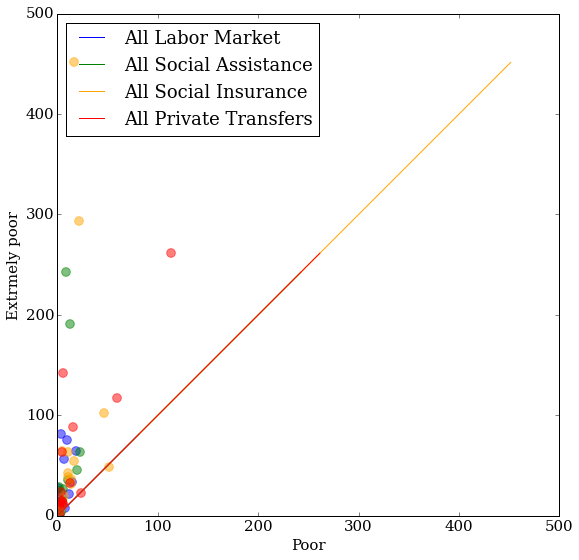

In [217]:
plt.figure(figsize=(9,9))
for cat in list_cat_names:
    plt.scatter(shares[cat,"poor"],shares[cat,"extreme"],color=key_to_col[cat],alpha=.5,s=75)
    plt.xlabel("Poor")
    plt.ylabel("Extrmely poor")
    m=max(shares[cat,"poor"].max(),shares[cat,"extreme"].max())
    plt.plot([0, m],[0,m],color=key_to_col[cat])
    
plt.legend(list_cat_names,loc="upper left")    
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.savefig("share_of_income_from_transferts_ep.png")

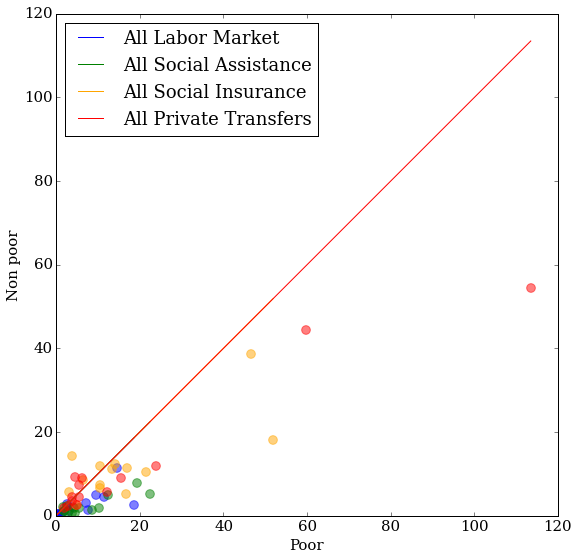

In [212]:
plt.figure(figsize=(9,9))
for cat in list_cat_names:
    plt.scatter(shares[cat,"poor"],shares[cat,"nonpoor"],color=key_to_col[cat],alpha=.5,s=75)
    plt.xlabel("Poor")
    plt.ylabel("Non poor")
    m=max(shares[cat,"poor"].max(),shares[cat,"nonpoor"].max())
    plt.plot([0, m],[0,m],color=key_to_col[cat])
    
plt.legend(list_cat_names,loc="upper left")    
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.savefig("share_of_income_from_transferts.png")

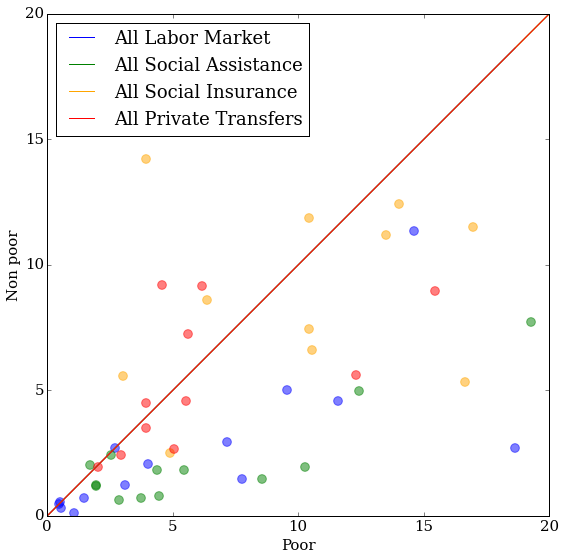

In [213]:
plt.figure(figsize=(9,9))
for cat in list_cat_names:
    plt.scatter(shares[cat,"poor"],shares[cat,"nonpoor"],color=key_to_col[cat],alpha=.5,s=75)
    plt.xlabel("Poor")
    plt.ylabel("Non poor")
    m=max(shares[cat,"poor"].max(),shares[cat,"nonpoor"].max())
    plt.plot([0, m],[0,m],color=key_to_col[cat])
    
plt.legend(list_cat_names,loc="best")    
plt.xlim(xmin=0,xmax=20)
plt.ylim(ymin=0,ymax=20)
plt.savefig("share_of_income_from_transferts_zoom.png")